In [9]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn; seaborn.set()

In [3]:
data = pd.read_csv('../data/raw_data/Fremont_Bridge_Hourly_Bicycle_Counts.csv', index_col='Date', parse_dates=True)

In [4]:
data.head(5)

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-03-31 23:00:00,6.0,10.0
2019-03-31 22:00:00,7.0,14.0
2019-03-31 21:00:00,18.0,15.0
2019-03-31 20:00:00,26.0,31.0
2019-03-31 19:00:00,30.0,58.0


In [5]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')

In [6]:
data.dropna().describe()

,West,East,Total
count,56895.000000,56895.000000,56895.000000
mean,51.972353,58.154478,110.126830
std,67.479946,84.679053,139.538643
min,0.000000,0.000000,0.000000
25%,6.000000,7.000000,14.000000
50%,28.000000,29.000000,59.000000
75%,69.000000,70.000000,143.000000
max,698.000000,717.000000,957.000000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56904 entries, 2019-03-31 23:00:00 to 2012-10-03 00:00:00
Data columns (total 3 columns):
West     56895 non-null float64
East     56895 non-null float64
Total    56895 non-null float64
dtypes: float64(3)
memory usage: 1.7 MB


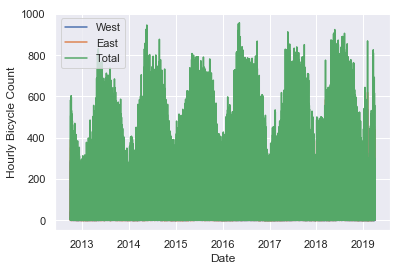

In [10]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

In [11]:
data.head(5)

,West,East,Total
Date,,,
2019-03-31 23:00:00,6.0,10.0,16.0
2019-03-31 22:00:00,7.0,14.0,21.0
2019-03-31 21:00:00,18.0,15.0,33.0
2019-03-31 20:00:00,26.0,31.0,57.0
2019-03-31 19:00:00,30.0,58.0,88.0


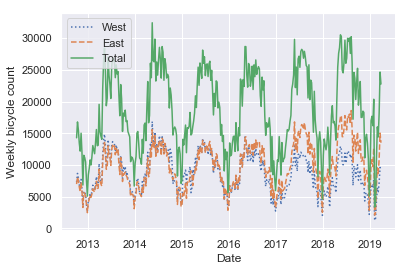

In [12]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

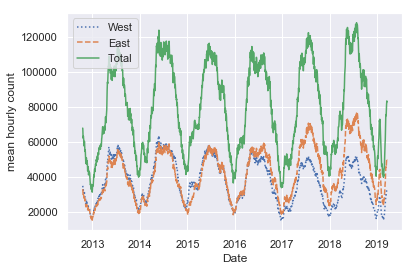

In [13]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

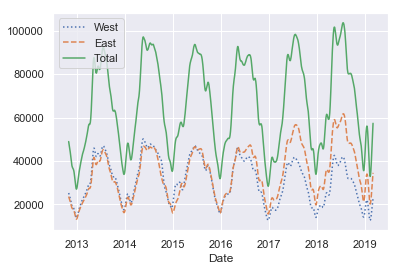

In [14]:
'''
The jaggedness of the result is due to the hard cutoff of the window. 
We can get a smoother version of a rolling mean using a window function–for example, a Gaussian window. 
The following code specifies both the width of the window (we chose 50 days) 
and the width of the Gaussian within the window (we chose 10 days):
'''
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'])

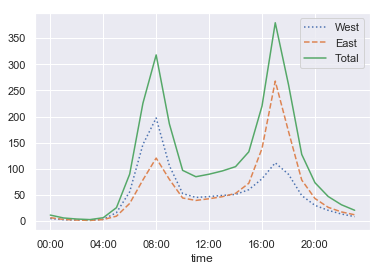

In [15]:
'''
Digging into the data
While these smoothed data views are useful to get an idea of the general trend in the data, 
they hide much of the interesting structure. For example, we might want to look at the average 
traffic as a function of the time of day. 
We can do this using the GroupBy functionality discussed in Aggregation and Grouping:

'''

by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

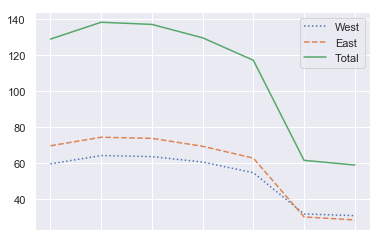

In [19]:
'''
The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the morning and 5:00 in the evening. 
This is likely evidence of a strong component of commuter traffic crossing the bridge. 
This is further evidenced by the differences between the western sidewalk 
(generally used going toward downtown Seattle), which peaks more strongly in the morning, 
and the eastern sidewalk (generally used going away from downtown Seattle), which peaks more strongly in the evening.

We also might be curious about how things change based on the day of the week. 
Again, we can do this with a simple groupby:

'''

by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

# TO do Add X-axis label from by_weekday values


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


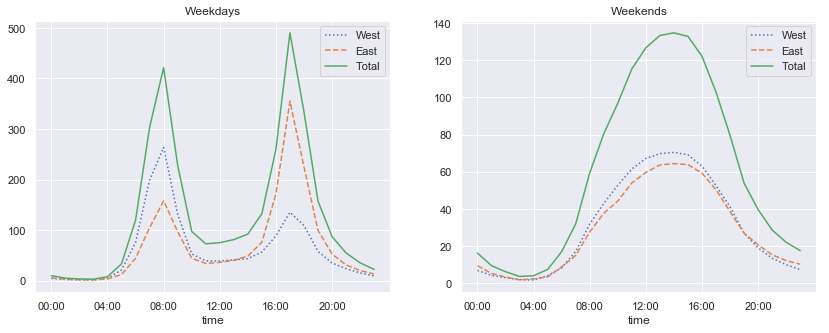

In [21]:
'''
This shows a strong distinction between weekday and weekend totals, 
with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.

With this in mind, let's do a compound GroupBy and look at the hourly trend on weekdays versus weekends. 
We'll start by grouping by both a flag marking the weekend, and the time of day:
'''
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);